In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis 

In [12]:
# Import relationship csv
relationship_df = pd.read_csv('country_relationship.csv') 

In [14]:
# Create static network object from countries relationships dataframe
G = nx.from_pandas_edgelist(relationship_df, source = "source", target = "target", edge_attr =  "value", create_using = nx.Graph)

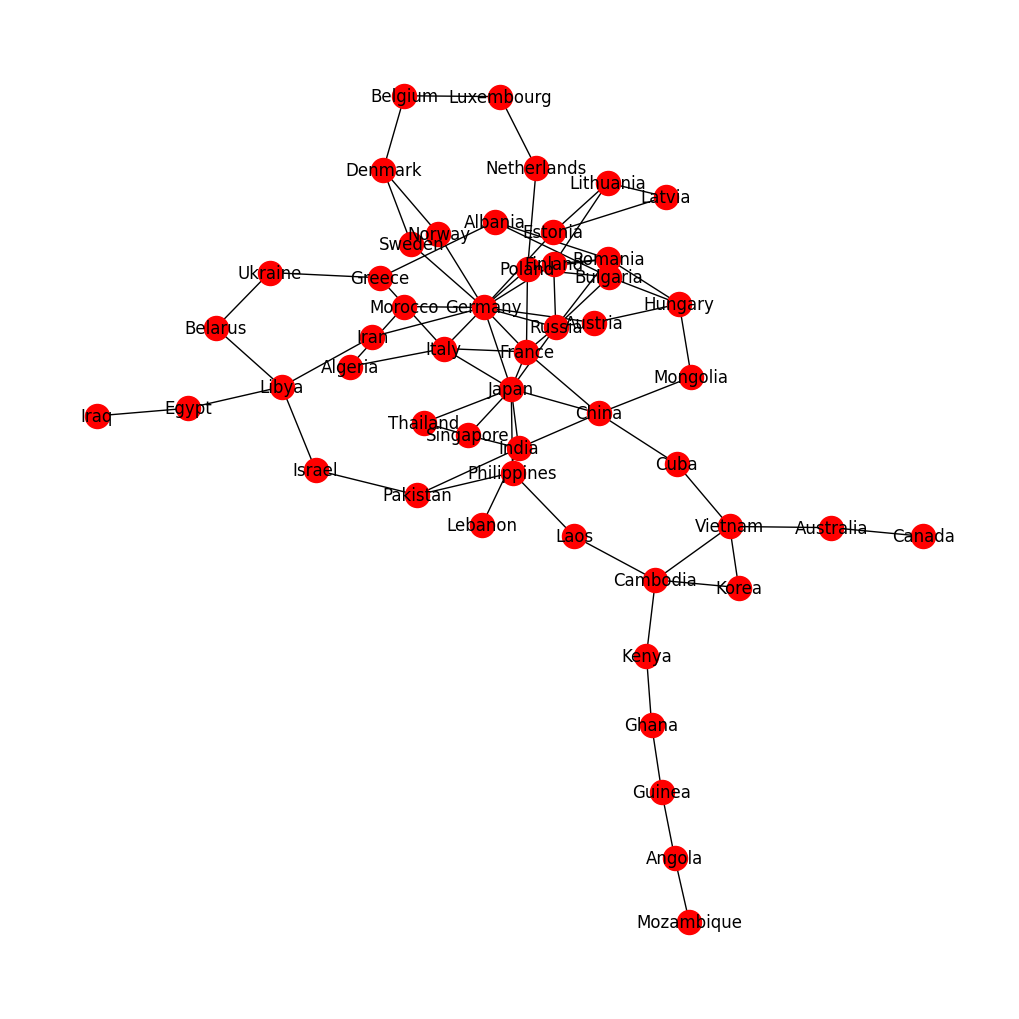

In [16]:
# Show network object
plt.figure(figsize = (10,10))
pos = nx.kamada_kawai_layout (G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)

In [20]:
#  Built an interactive network graph with pyvis

# Define net object
net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')
# Define nodes from the G object
node_degree = dict(G.degree)
# Setting up node size attributes to display
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_= True)
net.repulsion()
#net.show("country.html")
#Saving as HTML file
net.save_graph("country.html")

country.html


In [38]:
# Used Leiden algorithm to detect any communities within the countries

from cdlib import algorithms
coms = algorithms.leiden(G)
# Convert coms to be more readable
new_com = coms.to_node_community_map()

In [40]:
# Put the output from new_com into a dictionary for graphing
dict_com = {k:v[0] for k, v in new_com.items()}

In [48]:
# Visualize the output of the communities algorithm on a new network graph and save it as HTML
nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white', cdn_resources='remote')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
#com_net.show("country_communities_leiden.html")
#Saving graph
com_net.save_graph("country_communities_leiden.html")

country_communities_leiden.html


In the markdown cells underneath, note your observations about the outputs.

Clearly, the two World Wars and surrounding events has a large impact on how often a country was mentioned and its relationship to another country. This is best shown in large amount of relationship that Germany and Japan has. These countries had their own communties as a result. Some relationships were surprising, but that could be due to lack of specific knowledge of their histories.

<Axes: >

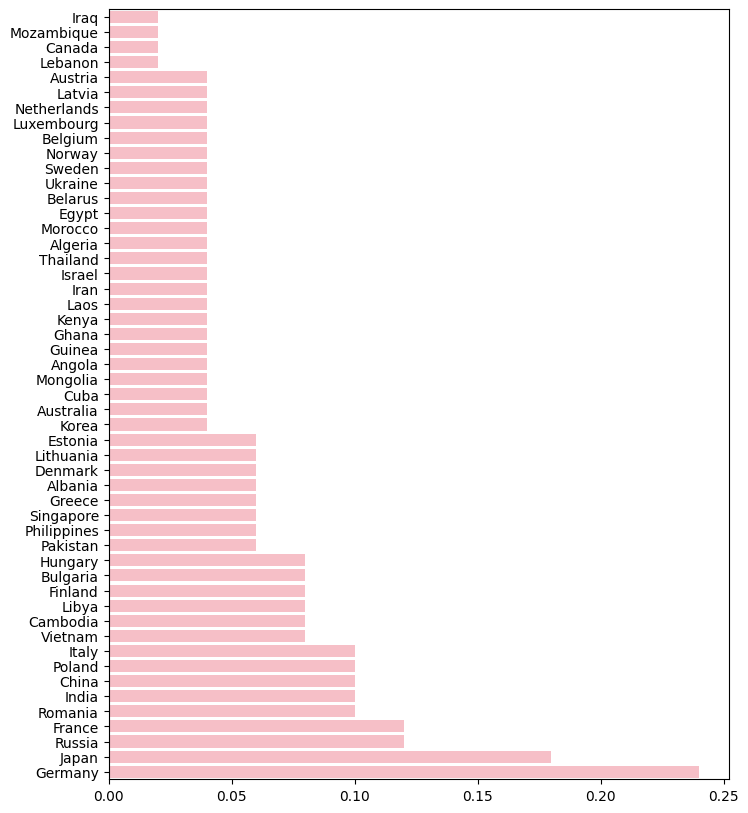

In [160]:
# Calculate and visualize the degree, closeness, and betweenness centrality measures 
# degree centrality first
degree_cent_dict = nx.degree_centrality(G)
# sorting dict using lambda and sorted function
degree_cent_dict = dict(sorted(degree_cent_dict.items(), key=lambda item: item[1]))
plt.figure(figsize = (8, 10))
sns.barplot(x = degree_cent_dict.values(), y = degree_cent_dict.keys(), color = "#FFB6C1", orient = "h")

<Axes: >

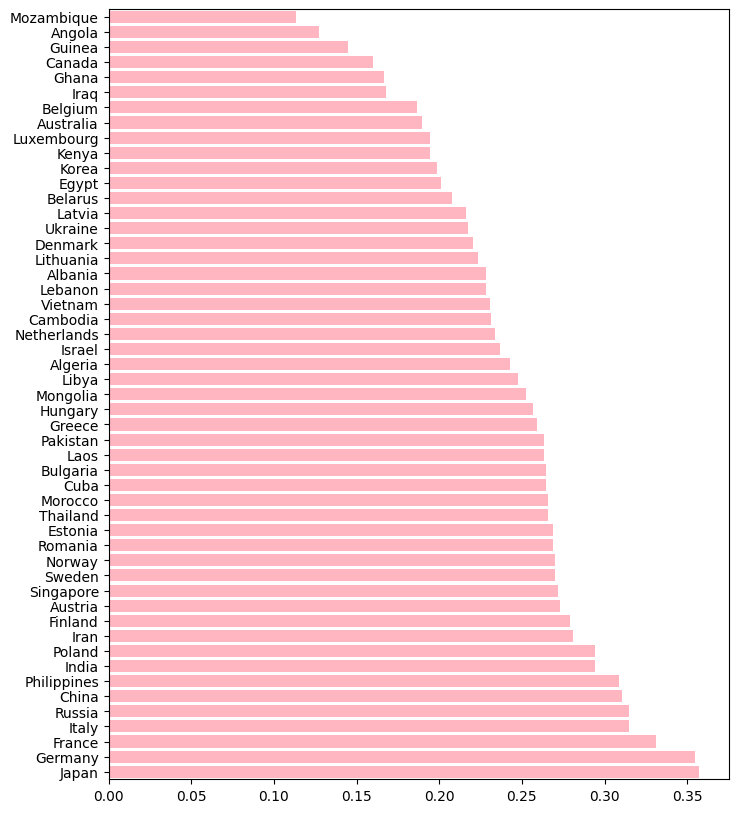

In [162]:
# closeness centrality
close_cent_dict = nx.closeness_centrality(G)
close_cent_dict = dict(sorted(close_cent_dict.items(), key=lambda item: item[1]))
plt.figure(figsize = (8, 10))
sns.barplot(x = close_cent_dict.values(), y = close_cent_dict.keys(), color = "#FFB6C1", orient = "h", saturation = 1)

<Axes: >

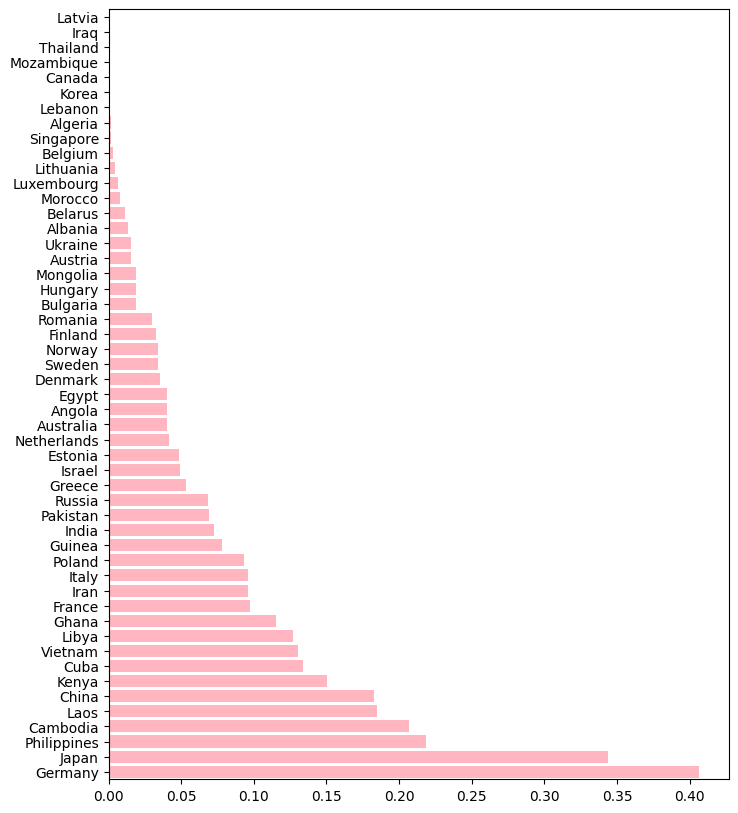

In [176]:
# betweenness centrality
btwn_cent_dict = nx.betweenness_centrality(G)
btwn_cent_dict = dict(sorted(btwn_cent_dict.items(), key=lambda item: item[1]))
plt.figure(figsize = (8, 10))
sns.barplot(x = btwn_cent_dict.values(), y = btwn_cent_dict.keys(), color = "#FFB6C1", orient = "h", saturation = 1)

 In the markdown cells underneath, note your observations about the outputs.

Germany and Japan have the highest values accross all graphs which exemplifies their important in 20th-century key events. Iraq is on the lowest end for all scores suggesting they had low involvment in world politics at the time. France has high degree and closeness centrality, but low betweenness; therefore, France has a lot of interactions with other countries yet doesn't encourage other countries to interact. These are just a few of the numerous observations that can be drawn from this data. 